# Introdução Prática à Teoria dos Grafos

Bem-vindo(a) a este notebook hands on! Aqui você aprenderá conceitos básicos de grafos enquanto coloca a mão na massa. O notebook apresenta uma breve teoria dos grafos, seguida de atividades práticas para criação, visualização e manipulação de grafos usando Python.

Vamos explorar: 
- Grafos simples (não direcionados e sem laços ou arestas paralelas);
- Grafos direcionados;
- Grafos ponderados.

Ao final, você encontrará alguns exercícios para praticar os conceitos aprendidos.

## Resumo da Teoria dos Grafos

Um **grafo** é uma estrutura composta por um conjunto de **nodos** (ou vértices) e um conjunto de **arestas** que conectam pares de nodos. Na notação, um grafo simples é definido como:

    G = (V, E)

onde:

- **V** é o conjunto dos nodos;
- **E** é o conjunto das arestas, que são pares de nodos (por exemplo, *(u, v)*).

### Grafos Simples

- Não possuem laços (arestas que conectam um nodo a ele mesmo).
- Não possuem arestas paralelas (mais de uma aresta conectando os mesmos dois nodos).

### Grafos Direcionados

Em grafos direcionados (digrafos), as arestas possuem uma direção. Assim, *(u, v)* não é o mesmo que *(v, u)*. Isso permite modelar relações assimétricas, como em redes sociais onde nem toda amizade é recíproca.

### Grafos Ponderados

Em grafos ponderados, cada aresta possui um **peso** que indica a intensidade, custo ou capacidade da conexão. A notação pode ser expandida para:

    G = (V, E, W)

onde **W** é o conjunto de pesos (geralmente números reais positivos ou, em alguns casos, negativos).

## Atividade 1: Criando e Visualizando um Grafo Simples

Nesta primeira atividade, vamos criar um grafo simples utilizando a biblioteca **NetworkX** e visualizar seu desenho com o **Matplotlib**. Siga os passos do código abaixo:

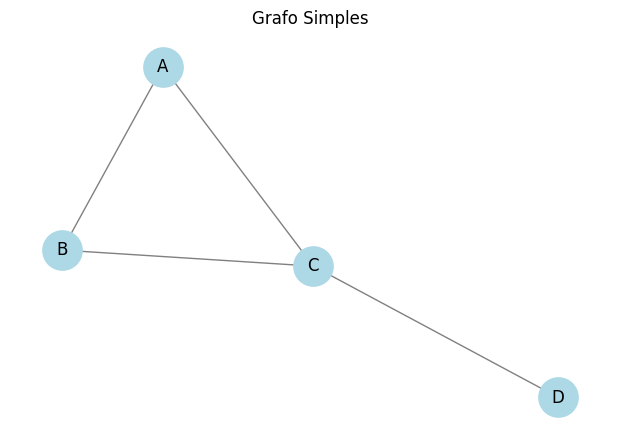

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria um grafo simples (não direcionado)
G = nx.Graph()

# Adiciona nodos
nodos = ["A", "B", "C", "D"]
G.add_nodes_from(nodos)

# Adiciona arestas
arestas = [("A", "B"), ("A", "C"), ("B", "C"), ("C", "D")]
G.add_edges_from(arestas)

# Desenha o grafo
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.title('Grafo Simples')
plt.show()

## Atividade 2: Trabalhando com Grafos Direcionados

Agora, vamos criar um grafo direcionado para modelar relações assimétricas. Por exemplo, em uma rede social, a relação "seguir" pode não ser recíproca.

Experimente criar um digrafo e visualize-o.

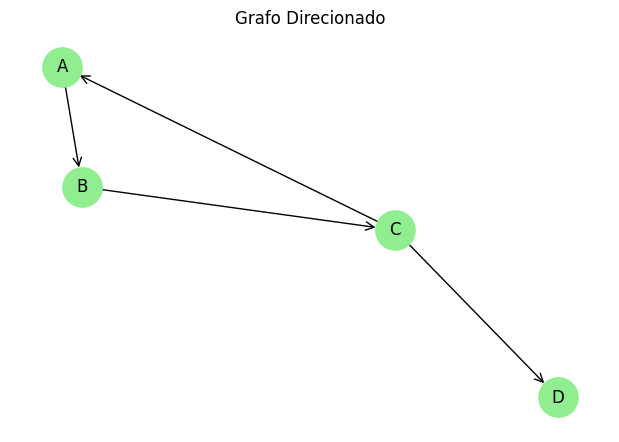

In [4]:
# Cria um grafo direcionado
DG = nx.DiGraph()

# Adiciona nodos
DG.add_nodes_from(nodos)

# Adiciona arestas direcionadas (exemplo: A segue B, mas B não segue A)
arestas_direcionadas = [("A", "B"), ("B", "C"), ("C", "A"), ("C", "D")]
DG.add_edges_from(arestas_direcionadas)

# Desenha o grafo direcionado
plt.figure(figsize=(6, 4))
nx.draw(DG, with_labels=True, node_color='lightgreen', arrowstyle='->', arrowsize=15, node_size=800, edge_color='black')
plt.title('Grafo Direcionado')
plt.show()

## Atividade 3: Grafos Ponderados

Nesta atividade, vamos adicionar pesos às arestas para representar a intensidade ou o custo das conexões. No exemplo a seguir, o peso indica a força da conexão entre os nodos.

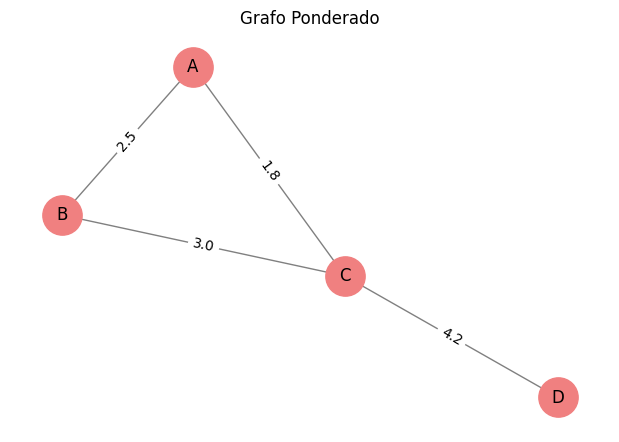

In [5]:
# Cria um grafo ponderado
WG = nx.Graph()

# Adiciona nodos
WG.add_nodes_from(nodos)

# Adiciona arestas com pesos
arestas_ponderadas = [
    ("A", "B", 2.5),
    ("A", "C", 1.8),
    ("B", "C", 3.0),
    ("C", "D", 4.2)
]
for u, v, peso in arestas_ponderadas:
    WG.add_edge(u, v, weight=peso)

# Desenha o grafo ponderado
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(WG)
nx.draw(WG, pos, with_labels=True, node_color='lightcoral', node_size=800, edge_color='gray')

# Adiciona os rótulos dos pesos
pesos = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=pesos)

plt.title('Grafo Ponderado')
plt.show()

## Exercícios

1. **Contagem de Nodos e Arestas:** Utilizando o grafo simples criado na Atividade 1, escreva um código que imprima o número de nodos e o número de arestas.

2. **Conversão para Digrafo:** A partir do grafo simples, crie um digrafo onde cada aresta seja convertida em duas arestas direcionadas (duas direções). 

3. **Filtragem em Grafos Ponderados:** Modifique o grafo ponderado para exibir apenas as arestas cujo peso seja maior que 2.0.

Tente resolver os exercícios e valide suas respostas utilizando os métodos da biblioteca NetworkX.

Número de nodos (Grafo Simples): 4
Número de arestas (Grafo Simples): 4
Número de arestas (Digrafo Bidirecional): 8


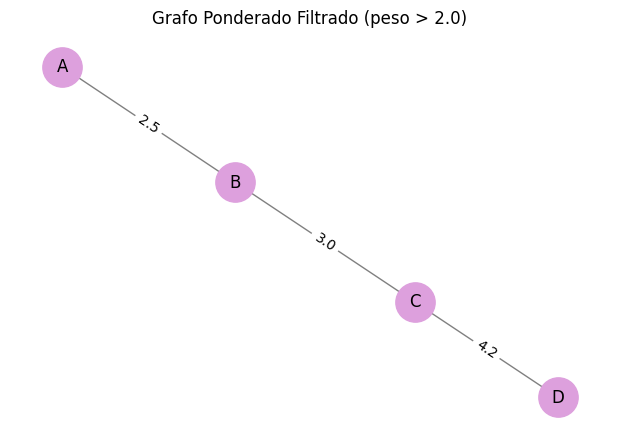

In [6]:
# Exercício 1: Contagem de nodos e arestas
print(f"Número de nodos (Grafo Simples): {G.number_of_nodes()}")
print(f"Número de arestas (Grafo Simples): {G.number_of_edges()}")

# Exercício 2: Converter grafo simples em digrafo com arestas em ambas direções
DG_bidirecional = nx.DiGraph()
DG_bidirecional.add_nodes_from(G.nodes())
for u, v in G.edges():
    DG_bidirecional.add_edge(u, v)
    DG_bidirecional.add_edge(v, u)

print(f"Número de arestas (Digrafo Bidirecional): {DG_bidirecional.number_of_edges()}")

# Exercício 3: Filtrar arestas com peso > 2.0
WG_filtrado = nx.Graph()
WG_filtrado.add_nodes_from(WG.nodes(data=True))
for u, v, data in WG.edges(data=True):
    if data['weight'] > 2.0:
        WG_filtrado.add_edge(u, v, weight=data['weight'])

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(WG_filtrado)
nx.draw(WG_filtrado, pos, with_labels=True, node_color='plum', node_size=800, edge_color='gray')
pesos_filtrados = nx.get_edge_attributes(WG_filtrado, 'weight')
nx.draw_networkx_edge_labels(WG_filtrado, pos, edge_labels=pesos_filtrados)
plt.title('Grafo Ponderado Filtrado (peso > 2.0)')
plt.show()

## Conclusão

Neste notebook, você teve uma introdução prática aos conceitos fundamentais da teoria dos grafos, incluindo grafos simples, direcionados e ponderados. Continue explorando os exemplos e adaptando os códigos para se aprofundar ainda mais na análise de redes!